# **STROJNO UČENJE** 22./23.
# Vježba 05 - Stabla odluke & slučajne šume

## Stabla odluke

[Stablo odluke](https://en.wikipedia.org/wiki/Decision_tree_learning) je algoritam nadziranog učenja kojim se može vršiti zadatak klasifikacije ili regresije. Odnosno o zadatku, govorimo o klasifikacijskom stablu ili regresijskom stablu odluke. Mi ćemo se fokusirati na klasifikacijsku varijantu, iako u sklearn biblioteci [postoji implementirana](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) i regresijska verzija.

Prolazeći kroz skup podataka oblika $(x,y) =  ($podatak, labela$)$ algoritam uči pravila prema kojima određuje klasu (labelu) datog podatka. Rezultat je postupak zaključivanja kojeg možemo prikazati strukturom stabla:
- čvorovi su značajke podataka prema kojima se vrši odlučivanje/razvrstavanje - nakon razvrstavanja, dio podataka pripada podstablu jedne vrste (npr. oni podaci koji imaju danu značajku *manju* od praga razvrstavanja), a ostatak podataka pripada podstablu druge vrste (oni podaci koji imaju danu značajku *veću* od praga),
- listovi su konačne klase; rezultat razvrstavanja/klasifikacije podataka.

Sami čvorovi stabla su povezani bridovima u vizualizacijama kako bi se moglo pratiti logiku razvrstavanja. Ono što podrazumijeva učenje stabla je pronalazak "dobrih" značajki za grananje i prag vrijednosti te značajke prema kojoj se vrši grananje.

Kako odlučiti što "staviti u čvor", odnosno prema kojoj značajki vršiti grananje? Računanjem vrijednosti koje ukazuju na "korisnost"/"kvalitetu" grananja u pitanju - [gini indeks nečistoće](https://www.quora.com/What-is-the-interpretation-and-intuitive-explanation-of-Gini-impurity-in-decision-trees) (eng. **gini impurity**) ili [dobitak informacije](https://machinelearningmastery.com/information-gain-and-mutual-information/#:~:text=Mutual%20Information%20Related%3F-,What%20Is%20Information%20Gain%3F,samples%2C%20and%20hence%20less%20surprise.) (eng. **information gain**).

- Gini impurity - mjera učestalosti pogrešne klasifikacije slučajno odabranog podatka ukoliko bi ga se slučajno kategoriziralo prema distribuciji kategorija (klasa) u podskupu (skupa podataka) - želimo smanjiti
- information gain - mjera smanjenja entropije (slučajnosti ili iznenađenja) podjelom (razvrstavanjem) podataka prema danoj značajki po zadanom pragu - želimo povećati

\* Za one koji vole teoriju: [više o information gain](https://en.wikipedia.org/wiki/Information_gain_(decision_tree)).

### Jednostavni primjer

Koristimo klasični skup podataka za uvodna objašanjavanja ("hello world" u svijetu strojnog učenja) - [iris](https://archive.ics.uci.edu/ml/datasets/iris).

In [27]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X_iris, y_iris = iris.data, iris.target

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_iris, y_iris)

In [ ]:
# tree.plot_tree(clf)

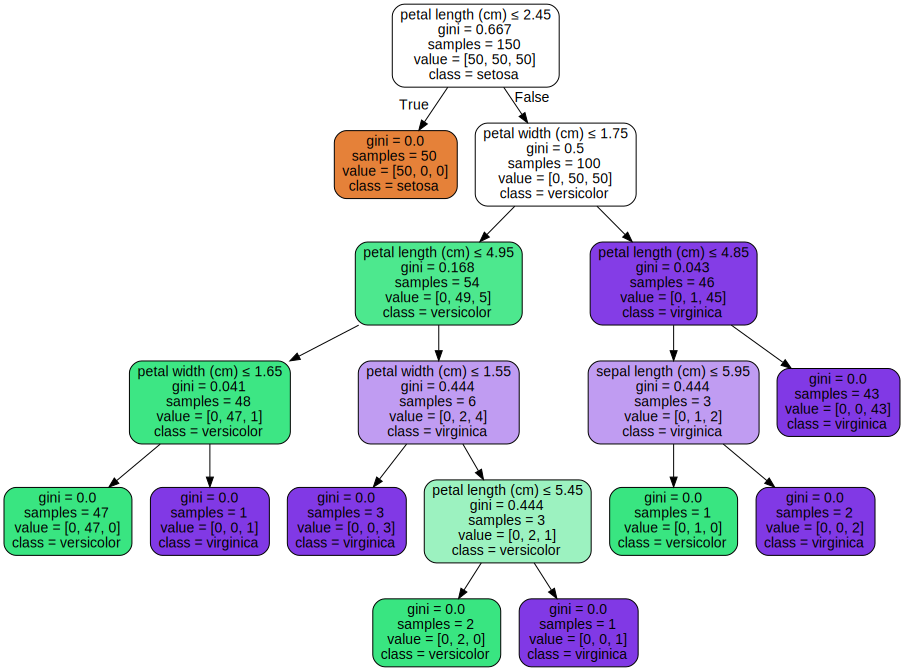

In [31]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Kompliciraniji primjer

Kodiranje kategoričkih varijabli nije trivijalan problem i nema univerzalno najboljeg postupka. To je posebno očito pri vektorizaciji teksta, koji je nestrukturirani tip podatka. Zbog toga je dobro biti svjestan prirode podataka koje pretvaramo u numeričke ekvivalente. Za tu svrhu možemo zamisliti da postoji [7 tipova podataka](https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689), umjesto standardna dva koja se spominju (kategorički i numerički).

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# učitavanje podataka
data = pd.read_csv('/content/drive/MyDrive/strojno_ucenje_2223/vj_04/adult.csv', header=None)

# čišćenje podataka
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data['workclass'].replace(' ?', np.nan, inplace=True)
data['occupation'].replace(' ?', np.nan, inplace=True)
data['native_country'].replace(' ?', np.nan, inplace=True)

# odabir zavisne varijable
X = data.drop(['income'], axis=1)
y = data['income']

# podjela skupa podataka na podatke za treniranje i testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# data imputation
for df in [X_train, X_test]:
    df['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)  

In [35]:
categorical_variables = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

temps = {}
for variable in categorical_variables:
  temps[variable] = X_train[variable].value_counts().rename_axis('unique_values_' + variable).reset_index(name='counts')

  unique_values_workclass  counts
0                 Private   17202
1        Self-emp-not-inc    1773
2               Local-gov    1475
3               State-gov     896
4            Self-emp-inc     761
5             Federal-gov     672
6             Without-pay      11
7            Never-worked       2
   unique_values_education  counts
0                  HS-grad    7431
1             Some-college    5075
2                Bachelors    3709
3                  Masters    1232
4                Assoc-voc     988
5                     11th     795
6               Assoc-acdm     710
7                     10th     647
8                  7th-8th     473
9              Prof-school     412
10                     9th     362
11                    12th     315
12               Doctorate     259
13                 5th-6th     226
14                 1st-4th     122
15               Preschool      36
  unique_values_marital_status  counts
0           Married-civ-spouse   10518
1                Neve

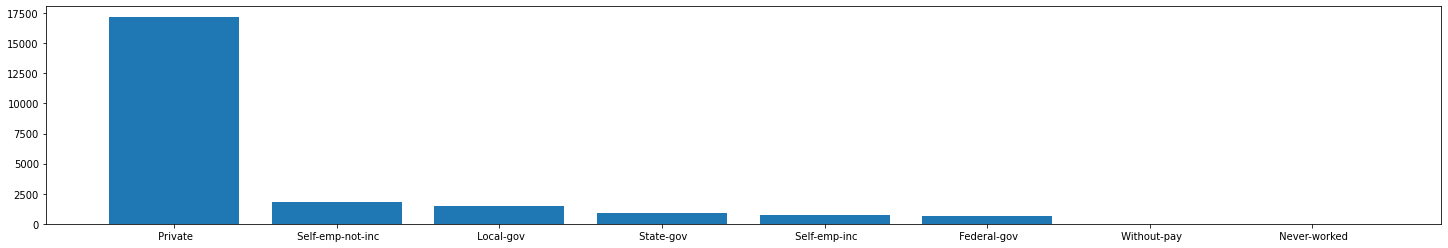

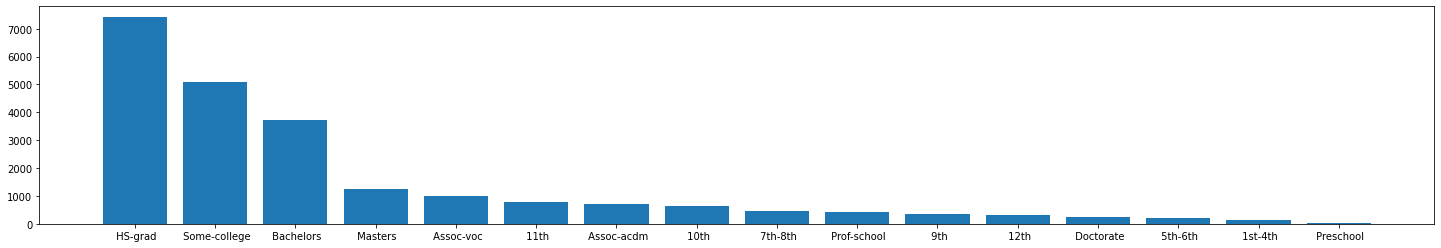

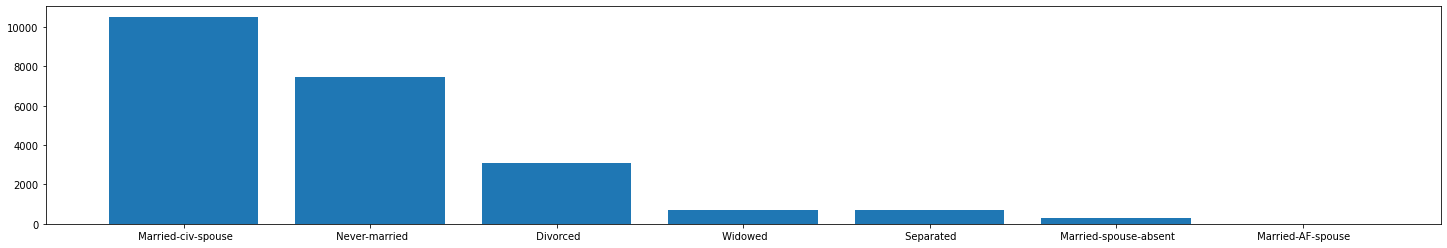

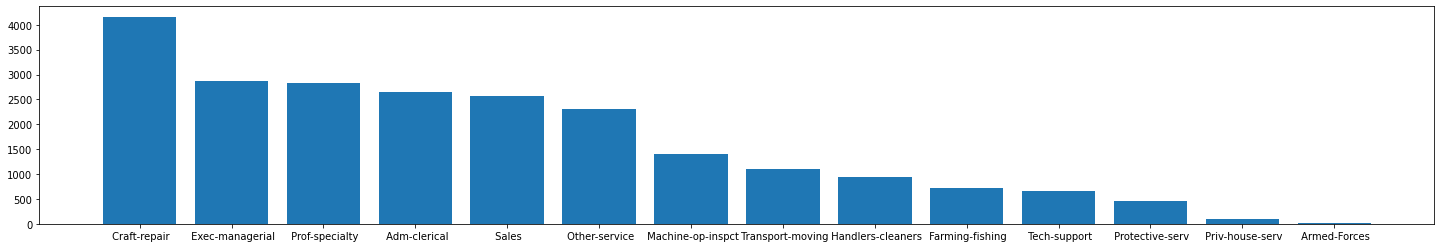

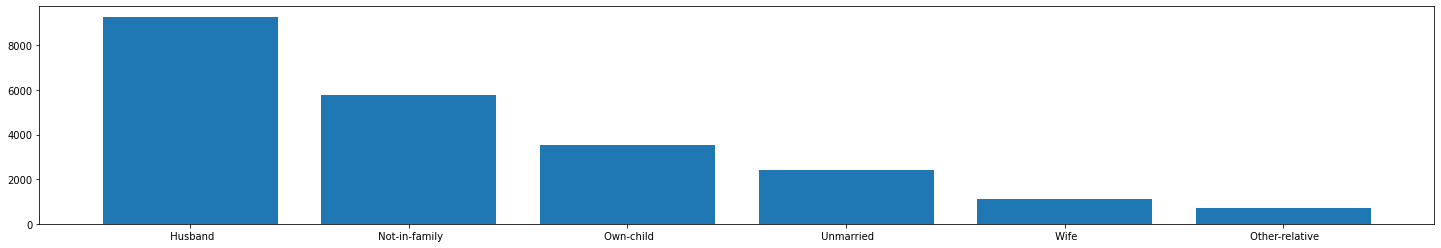

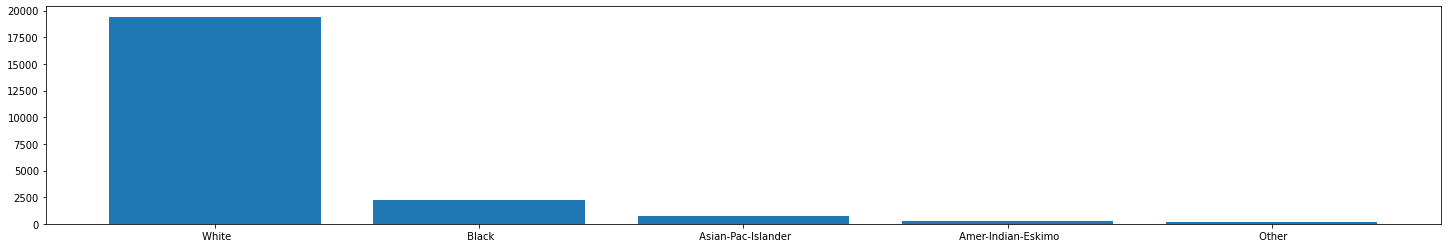

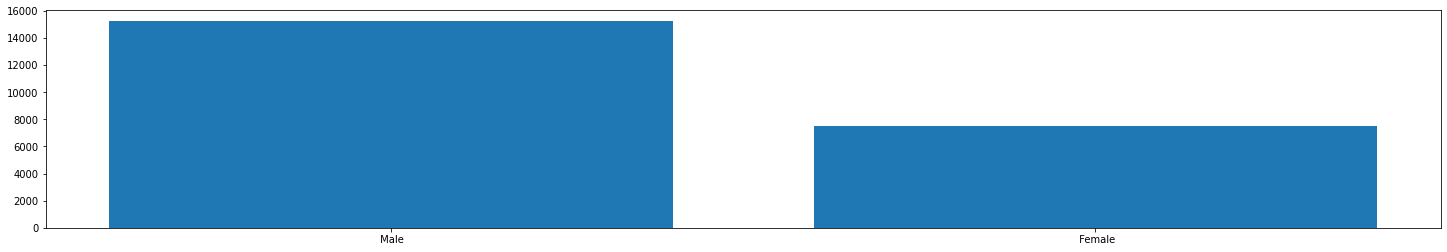

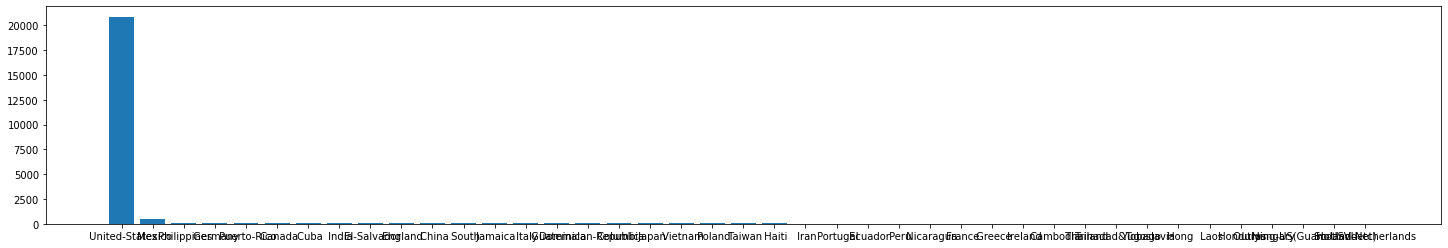

In [36]:
import matplotlib.pyplot as plt

for variable in categorical_variables:
  print(temps[variable])

for variable in categorical_variables:
  plt.figure(figsize=(25,4))
  plt.bar(temps[variable]['unique_values_' + variable], temps[variable]['counts'])
  plt.show()

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.6 MB/s 


Za kodiranje kategoričkih varijabli koristimo [CountFrequencyEncoder](https://feature-engine.readthedocs.io/en/1.1.x/encoding/CountFrequencyEncoder.html). Svaku kategoriju zamijenimo njenim brojem pojavljivanja unutar skupa podataka.

Ovo je svojevrsno poboljšanje u odnosu na kodiranje kategoričkih varijabli koje smo vidjeli dosada:
- običnim brojevnim oznakama ($1, 2, 3, \ldots$) uvodimo *uređaj* u varijable koji ne postoji kod nominalnih kategoričkih varijabli,
- one-hot kodiranjem (vektorima oblika $[0, \ldots, 0, 1, 0, \ldots, 0]$) dobivamo velike vektore (puno stupaca) za varijable s puno kategorija.

In [37]:
from feature_engine.encoding import CountFrequencyEncoder

In [38]:
encoder = CountFrequencyEncoder(encoding_method='count')
encoder.fit(X_train[categorical_variables])
X_train[categorical_variables] = encoder.transform(X_train[categorical_variables])
X_test[categorical_variables] = encoder.transform(X_test[categorical_variables])

In [39]:
X_train[categorical_variables]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,17202,7431,10518,4162,9279,19428,15272,20861
25206,896,7431,3076,2649,2412,19428,7520,20861
23491,17202,5075,10518,2566,9279,19428,15272,20861
12367,17202,7431,7472,4162,5770,19428,15272,48
7054,17202,473,7472,4162,5770,19428,15272,88
...,...,...,...,...,...,...,...,...
13123,1475,1232,10518,2873,9279,19428,15272,20861
19648,17202,647,7472,711,2412,19428,15272,20861
9845,17202,5075,710,2566,3551,19428,7520,20861
10799,1475,259,10518,2873,9279,19428,15272,20861


In [40]:
y_train.replace(' >50K', 0, inplace=True)
y_train.replace(' <=50K', 1, inplace=True)
y_train

32098    0
25206    1
23491    0
12367    1
7054     1
        ..
13123    0
19648    1
9845     1
10799    0
2732     1
Name: income, Length: 22792, dtype: int64

In [41]:
y_test.replace(' >50K', 0, inplace=True)
y_test.replace(' <=50K', 1, inplace=True)
y_test

22278    1
8950     1
7838     1
16505    1
19140    0
        ..
21949    0
26405    0
23236    0
26823    1
20721    1
Name: income, Length: 9769, dtype: int64

In [42]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [43]:
from sklearn.metrics import accuracy_score

print('Točnost: ', accuracy_score(y_pred, y_test))

Točnost:  0.8055072167059064


Skaliranje numeričkih varijabli ne utječe na točnost klasifikacije! Metode temeljene na stablima odluke (uključujući i slučajne šume) su *invarijantne na monotone transformacije* podataka.

In [44]:
from sklearn.preprocessing import StandardScaler

numerical_variables = set(X_train.columns) - set(categorical_variables)
numerical_variables = list(numerical_variables)

scaler = StandardScaler()
scaler.fit(X_train[numerical_variables])
X_train[numerical_variables] = scaler.transform(X_train[numerical_variables])
X_test[numerical_variables] = scaler.transform(X_test[numerical_variables])

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# print('Točnost (train): ', np.sqrt(accuracy_score(clf.predict(X_train), y_train)))
print('Točnost (test): ', accuracy_score(y_pred, y_test))

Točnost (test):  0.8082710615211383


## Slučajne šume

[Slučajna šuma](https://en.wikipedia.org/wiki/Random_forest) je algoritam koji je poboljšanje stabla odluke. Kako? Primjenom tzv. "uvrećavanja" (uzimamo više objekata iste vrste i "stavljamo u istu vreću" te koristimo kao jedan veliki objekt druge vrste) - eng. [bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating).

Slučajna šuma je algoritam kod kojeg definiramo i učimo više stabala odluke te kao konačni rezultat algoritma uzimamo (težinski) prosjek rezultata svih stabala. Prosjek za slučaje klasifikacije je kategorička sredina - mod, a za slučaje regresije je numerička sredina - aritmetička sredina.

Slučajna šuma je primjer tzv. [metoda ansambla](https://en.wikipedia.org/wiki/Ensemble_learning) - kolekcije više algoritama koji sami mogu riješiti problem, a koje tretiramo kao jedan unificirani algoritam.

Koristimo iste podatke kako bi demonstrirali poboljšanje točnosti na skupu za testiranje.

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train) # duže treniranje!

y_pred_rf = clf_rf.predict(X_test)

# print('Točnost (train): ', accuracy_score(clf_rf.predict(X_train), y_train))
print('Točnost (test): ', accuracy_score(y_pred_rf, y_test))

Točnost (test):  0.8581226328180981


### Traženje najboljih hiperparametara za model

Umjesto iteriranja po listi vrijendosti hiperparametara ručno, i gradeći model za svaku kombinaciju, koristimo ugrađenu sklearn metodu [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) koja to radi umjesto nas - pritom implementirajući tzv. unakrsnu validaciju (eng. **cross-validation**).

[Unakrsna validacija](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) je postupak kojim se pokušava povećati generalizacijska moć modela, na način da se prilikom odabira hiperparametara (kao kod korištenja GridSearch pretrage) sami model s trenutnom kombinacijom hiperparametara testira na odvojenom skupu podataka od podataka za treniranje, tzv. validacijskom skupu podataka.

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[20, 50, 100, 200], 'max_features':[1, 4, 10]} # definiramo mrežu hiperparametara

rf = RandomForestClassifier() # definiramo klasifikator
clf_grid = GridSearchCV(rf, parameters, verbose=2)

clf_grid.fit(X_train, y_train) # treniranje traje dugo jer za svaku kombinaciju hiperparametara treniramo model!

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................max_features=1, n_estimators=20; total time=   0.3s
[CV] END ....................max_features=1, n_estimators=20; total time=   0.3s
[CV] END ....................max_features=1, n_estimators=20; total time=   0.3s
[CV] END ....................max_features=1, n_estimators=20; total time=   0.3s
[CV] END ....................max_features=1, n_estimators=20; total time=   0.3s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.7s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.7s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.7s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.7s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.7s
[CV] END ...................max_features=1, n_estimators=100; total time=   1.3s
[CV] END ...................max_features=1, n_es

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [1, 4, 10],
                         'n_estimators': [20, 50, 100, 200]},
             verbose=2)

Najvažniji parametri kod slučajnih šuma su broj stabala u šumi i maksimalni broj značajki od kojih se bira značajka na temelju koje se radi podjela u čvoru - *n_estimators*, *max_features*.

In [ ]:
sorted(clf_grid.cv_results_.items()) # ispis rezultata unakrsne validacije

[('mean_fit_time',
  array([0.29153614, 0.70657349, 1.42438798, 2.74227567, 0.49853959,
         1.1908061 , 2.36255398, 4.59659629, 0.938692  , 2.30846763,
         4.57037334, 9.22378278])),
 ('mean_score_time',
  array([0.03264155, 0.07426367, 0.14642982, 0.27355261, 0.02913203,
         0.06275911, 0.12317219, 0.24673944, 0.02559452, 0.0573626 ,
         0.11164665, 0.22385154])),
 ('mean_test_score',
  array([0.84898148, 0.85367632, 0.85508039, 0.8572303 , 0.85069276,
         0.8549925 , 0.85727411, 0.85898526, 0.84784101, 0.8525794 ,
         0.85376412, 0.85613333])),
 ('param_max_features',
  masked_array(data=[1, 1, 1, 1, 4, 4, 4, 4, 10, 10, 10, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object)),
 ('param_n_estimators',
  masked_array(data=[20, 50, 100, 200, 20, 50, 100, 200, 20, 50, 100, 200],
               mask=[False, False, False, False, 

In [ ]:
print(clf_grid.best_params_) # ispis najboljih parametara (određenih pomoću score() metode za proslijeđeni klasifikator)

{'max_features': 4, 'n_estimators': 200}


Nakon što promotrimo najbolje hiperparametre, možemo zaključiti u kojem smjeru je najbolje ići pri daljnjem isprobavanju parametara. Npr., vidimo da je najbolje rezultate dalo *n_estimators*=200, što je bila gornja granica. Ovo nas navodi da bismo mogli isprobati i s još većim brojem stabala, itd.